In [12]:
import sys
sys.path.append("../../")
from taxcalc import *
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt 
from matplotlib.transforms import BlendedGenericTransform
%matplotlib inline

In [3]:
CBO_growth = {2013: {'_factor_target': [0.022, 
                                        0.024,
                                        0.024,
                                        0.025,
                                        0.026,
                                        0.023,
                                        0.018,
                                        0.019,
                                        0.021,
                                        0.021,
                                        0.021,
                                        0.02,
                                        0.02,
                                        0.02]
                     }
              }
behavior_traits = {2017: {'_BE_inc': [0.0], '_BE_sub': [0.4], '_BE_cg': [-3.487]}}

# Create the policies and calculators

In [4]:
policy_cl = Policy()
behavior_cl = Behavior()
records_cl = Records("../../puf.csv")
calc_cl = Calculator(policy_cl, records_cl, behavior_traits)
calc_cl.growth.update_economic_growth(CBO_growth)
for i in range(4):
    calc_cl.increment_year()
assert calc_cl.current_year == 2017
calc_cl.calc_all()
print "Done"

You loaded data for 2009.
Your data have been extrapolated to 2013.
Done


In [4]:
policy_amt = Policy()
behavior_amt = Behavior()
records_amt = Records("../../puf.csv")
reform_amt = {
    2017: {
        '_AMT_trt1': [0.0],
        '_AMT_trt2': [0.0]
    }
}
policy_amt.implement_reform(reform_amt)
calc_amt = Calculator(policy_amt, records_amt, behavior_amt)
calc_amt.growth.update_economic_growth(CBO_growth)
for i in range(4):
    calc_amt.increment_year()
assert calc_amt.current_year == 2017
calc_amt.calc_all()
calc_amt.behavior.update_behavior(behavior_traits)
calc_amt_beh = Behavior.response(calc_cl, calc_amt)
print "Done"

You loaded data for 2009.
Your data have been extrapolated to 2013.
Done


In [5]:
policy_bush = Policy()
behavior_bush = Behavior()
records_bush = Records("../../puf.csv")
reform_bush = {
    2017: {
        '_II_rt7': [0.35],
        '_CG_rt3': [0.15],
        '_II_prt': [0.0],
        '_ID_prt': [0.0],
        '_AMT_CG_rt3': [0.15],
        '_NIIT_trt': [0.0],
        '_PT_rt7': [0.35]
    }
}
policy_bush.implement_reform(reform_bush)
calc_bush = Calculator(policy_bush, records_bush, behavior_bush)
calc_bush.growth.update_economic_growth(CBO_growth)
for i in range(4):
    calc_bush.increment_year()
assert calc_bush.current_year == 2017
calc_bush.calc_all()
calc_bush.behavior.update_behavior(behavior_traits)
calc_bush_beh = Behavior.response(calc_cl, calc_bush)
print "Done"

You loaded data for 2009.
Your data have been extrapolated to 2013.
Done


In [5]:
policy_all = Policy()
behavior_all = Behavior()
records_all = Records("../../puf.csv")
reform_all = {
    2017: {
        '_II_rt1': [0.12],
        '_II_rt2': [0.12],
        '_II_rt3': [0.25],
        '_II_rt4': [0.25],
        '_II_rt5': [0.33],
        '_II_rt6': [0.33],
        '_II_rt7': [0.33],
        '_AMT_trt1': [0.0],
        '_AMT_trt2': [0.0],
        '_STD': [[12000, 24000, 12000, 18000, 24000, 12000, 1050]],
        '_STD_Aged': [[0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0]],
        '_II_em': [0,0,0,0],
        '_CTC_ps': [[75000, 150000, 75000, 75000, 75000, 75000]],
        '_II_credit': [[500, 500, 500, 500, 500, 500]],
        '_II_credit_ps': [[75000, 150000, 75000, 75000, 75000, 75000]],
        '_II_credit_prt': [0.05],
        '_ID_StateLocalTax_HC': [1.0],
        '_ID_Medical_HC': [1.0],
        '_ID_Casualty_HC': [1.0],
        '_ID_Miscellaneous_HC': [1.0],
        '_ID_RealEstate_HC': [1.0],
        '_ALD_Investment_ec': [0.5],        
        '_CG_as_II': [1],
        '_NIIT_trt': [0.0],
        '_PT_rt1': [0.12],
        '_PT_rt2': [0.12],
        '_PT_rt3': [0.25],
        '_PT_rt4': [0.25],
        '_PT_rt5': [0.25],
        '_PT_rt6': [0.25],
        '_PT_rt7': [0.25],
    }
}
policy_all.implement_reform(reform_all)
calc_all = Calculator(policy_all, records_all, behavior_all)
calc_all.growth.update_economic_growth(CBO_growth)
for i in range(4):
    calc_all.increment_year()
assert calc_all.current_year == 2017
calc_all.calc_all()
calc_all.behavior.update_behavior(behavior_traits)
calc_all_beh = Behavior.response(calc_cl, calc_all)
print "Done"

You loaded data for 2009.
Your data have been extrapolated to 2013.
Done


# Iterator and revenue impact

In [7]:
def static_path_change(calcx, calcy):
    static_path = [0] * 10
    calc1 = copy.deepcopy(calcx)
    calc2 = copy.deepcopy(calcy)
    for i in range(10):
        calc1.calc_all()
        calc2.calc_all()
        calc1_combined = (calc1.records._combined * calc1.records.s006)
        calc2_combined = (calc2.records._combined * calc2.records.s006)
        static_path[i] = (calc2_combined - calc1_combined).sum() / 10**9
        if calc1.current_year < 2026:
            calc1.increment_year()
            calc2.increment_year()
    return static_path

In [8]:
path1 = static_path_change(calc_cl, calc_all)
print 'Path assuming no behavioral response'
for x in path1:
    print x

Path assuming no behavioral response
-97.9137941446
-97.4789735132
-95.9056333998
-95.7266429503
-96.6918511548
-98.4224193285
-100.901734911
-104.326659845
-108.675065937
-114.135751242


In [8]:
path2 = static_path_change(calc_cl, calc_all_beh)
print 'Path with behavioral response'
for x in path2:
    print x

Path with behavioral response
-43.570697344
-41.0124080573
-37.7083966763
-35.200464866
-33.3496962875
-32.0716641396
-31.3302099502
-31.3403079555
-32.074325845
-33.9626235332


In [9]:
path3 = static_path_change(calc_amt, calc_all)
print 'Path assuming no behavioral response, compared against just AMT repeal'
for x in path3:
    print x

Path assuming no behavioral response, compared against just AMT repeal
-56.1204170172
-52.9642491727
-48.7411504756
-45.6313003599
-43.5347063674
-41.8481147726
-40.8672107143
-40.8007624044
-41.5313859206
-43.2507739781


In [10]:
path4 = static_path_change(calc_amt_beh, calc_all_beh)
print 'Path with behavioral response, compared against just AMT repeal'
for x in path4:
    print x

Path with behavioral response, compared against just AMT repeal
-3.32440139496
1.89571134451
7.82109209165
13.21609482
18.0131597448
22.5987143216
26.6414936889
29.9086655887
32.6028306951
34.2226516919


In [12]:
path5 = static_path_change(calc_bush, calc_all)
print 'Path assuming no behavioral response, compared against pre-2009 law'
for x in path5:
    print x

Path assuming no behavioral response, compared against pre-2009 law
-2.46868470222
0.937239267559
4.7353560907
8.35560934396
11.7131167702
14.8701680779
17.9664226125
20.5228205109
22.8844044817
24.6718040024


In [11]:
path6 = static_path_change(calc_bush_beh, calc_all_beh)
print 'Path with behavioral response, compared against pre-2009 law'
for x in path6:
    print x

Path with behavioral response, compared against pre-2009 law
1.15561780953
5.18101785542
9.45031758742
13.6481578894
17.6282164422
21.2921928527
25.0092432378
28.2183841904
31.1812109218
33.4868186055


# Diagnostics

In [25]:
def taxableGain(calc):
    tg = np.maximum(0., np.minimum(calc.records.c23650, calc.records.p23250)) + calc.records.e01100
    return tg

def num_ided(calc):
    ided = calc.records.s006[(calc.records.c04470 > 0.) * (calc.records.c00100 > 0.)].sum()
    return ided
def num_std(calc):
    std = calc.records.s006[(calc.records._standard > 0.) * (calc.records.c00100 > 0.)].sum()
    return std
def wavgMTR_wages(calc):
    mtr = ((calc.mtr('e00200p')[1] * calc.records.e00200 * calc.records.s006).sum() / 
                   (calc.records.e00200 * calc.records.s006).sum())
    return mtr
def wavgMTR_cg(calc):
    gain = taxableGain(calc)
    mtr = ((calc.mtr('p23250')[1] * gain * calc.records.s006).sum() / 
                 (gain * calc.records.s006).sum())
    return mtr
def wavgMTR_int(calc):
    mtr = ((calc.mtr('e00300')[1] * calc.records.c00300 * calc.records.s006).sum() / 
                   (calc.records.c00300 * calc.records.s006).sum())
    return mtr
def wavgMTR_div(calc):
    mtr = ((calc.mtr('e00650')[1] * calc.records.c00650 * calc.records.s006).sum() / 
                   (calc.records.c00650 * calc.records.s006).sum())
    return mtr
def wavgMTR_stcg(calc):
    gain = taxableGain(calc)
    mtr = ((calc.mtr('p22250')[1] * gain * calc.records.s006).sum() / 
                 (gain * calc.records.s006).sum())
    return mtr
def wavgMTR_passthru(calc):
    passthruInc = abs(calc.records.c00900) + abs(calc.records.c26270)
    mtr_c = calc.mtr('e00900p')[1]
    mtr_e = calc.mtr('e02000')[1]    
    wtot = mtr_c * abs(calc.records.c00900) + mtr_e * abs(calc.records.c26270)
    mtr = (wtot * calc.records.s006).sum() / (passthruInc * calc.records.s006).sum()
    return mtr
def wavgMTR_sp(calc):
    sp_inc = abs(calc.records.c00900)
    mtr = ((calc.mtr('e00900p')[1] * sp_inc * calc.records.s006).sum() / 
           (sp_inc * calc.records.s006).sum())
    return mtr
def wavgMTR_schE(calc):
    schE_inc = abs(calc.records.c26270)
    mtr = ((calc.mtr('e02000')[1] * schE_inc * calc.records.s006).sum() / 
                   (schE_inc * calc.records.s006).sum())
    return mtr
def no_inc_tax(calc):
    count = calc.records.s006[calc.records._iitax < 0.0001].sum()
    return count

def lwrMTR_wages(calc1, calc2):
    #calc1 is baseline, calc2 is reform
    diff = calc2.records.s006[(calc2.mtr('e00200p')[2] < calc1.mtr('e00200p')[2])].sum()
    return diff
def lwrMTR_cg(calc1, calc2):
    #calc1 is baseline, calc2 is reform
    diff = calc2.records.s006[(calc2.mtr('p23250')[2] < calc1.mtr('p23250')[2])].sum()
    return diff
def hgrMTR_wages(calc1, calc2):
    #calc1 is baseline, calc2 is reform
    diff = calc2.records.s006[(calc2.mtr('e00200p')[2] > calc1.mtr('e00200p')[2])].sum()
    return diff
def hgrMTR_cg(calc1, calc2):
    #calc1 is baseline, calc2 is reform
    diff = calc2.records.s006[(calc2.mtr('p23250')[2] > calc1.mtr('p23250')[2])].sum()
    return diff
def num_taxcut(calc1, calc2):
    #calc1 is baseline, calc2 is reform
    diff = calc2.records.s006[calc1.records._combined > calc2.records._combined + 0.0001].sum()
    return diff

def diagnose1(calc):
    print str(round(num_ided(calc) / 1000) / 1000.0) + " million taxpayers using itemized deductions"
    print str(round(num_std(calc) / 1000) / 1000.0) + " million taxpayers using the standard deduction"
    print "Average MTR on wage income: " + str(round(wavgMTR_wages(calc) * 10000) / 10000.0)
    print "Average MTR on long-term gains: " + str(round(wavgMTR_cg(calc) * 10000) / 10000.0)
    print "Average MTR on short-term gains: " + str(round(wavgMTR_stcg(calc) * 10000) / 10000.0)
    print "Average MTR on interest: " + str(round(wavgMTR_int(calc) * 10000) / 10000.0)
    print "Average MTR on qualified dividends: " + str(round(wavgMTR_div(calc) * 10000) / 10000.0)
    print "Average MTR on pass-through income: " + str(round(wavgMTR_passthru(calc) * 10000) / 10000.0)
    print "Average MTR on sole proprietorships: " + str(round(wavgMTR_sp(calc) * 10000) / 10000.0)
    print "Average MTR on partnership/S-corp: " + str(round(wavgMTR_schE(calc) * 10000) / 10000.0)
    print "Number paying no income tax: " + str(round(no_inc_tax(calc) / 1000) / 1000.0) + " million"
    
def diagnose2(calc1, calc2):
    #calc1 is baseline, calc2 is reform
    print "Number with lower EMTR on wages: " + str(round(lwrMTR_wages(calc1, calc2) / 1000) / 1000.0) + " million"
    print "Number with higher EMTR on wages: " + str(round(hgrMTR_wages(calc1, calc2) / 1000) / 1000.0) + " million"
    print "Number with lower EMTR on gains: " + str(round(lwrMTR_cg(calc1, calc2) / 1000) / 1000.0) + " million"
    print "Number with higher EMTR on gains: " + str(round(hgrMTR_cg(calc1, calc2) / 1000) / 1000.0) + " million"
    print "Number receiving a tax cut: " + str(round(num_taxcut(calc1, calc2) / 1000) / 1000.0) + " million"

In [26]:
diagnose1(calc_cl)

45.42 million taxpayers using itemized deductions
113.603 million taxpayers using the standard deduction
Average MTR on wage income: 0.2365
Average MTR on long-term gains: 0.222
Average MTR on short-term gains: 0.3136
Average MTR on interest: 0.2378
Average MTR on qualified dividends: 0.1756
Average MTR on pass-through income: 0.2955
Average MTR on sole proprietorships: 0.2771
Average MTR on partnership/S-corp: 0.3061
Number paying no income tax: 66.972 million


In [7]:
diagnose1(calc_all)

8.539 million taxpayers using itemized deductions
150.262 million taxpayers using the standard deduction
Average MTR on wage income: 0.2189
Average MTR on long-term gains: 0.1501
Average MTR on short-term gains: 0.3002
Average MTR on interest: 0.0982
Average MTR on qualified dividends: 0.1254
Average MTR on pass-through income: 0.2274
Average MTR on sole proprietorships: 0.2497
Average MTR on partnership/S-corp: 0.2147
Number paying no income tax: 61.042 million


In [8]:
diagnose1(calc_all_beh)

8.432 million taxpayers using itemized deductions
150.372 million taxpayers using the standard deduction
Average MTR on wage income: 0.2211
Average MTR on long-term gains: 0.1555
Average MTR on short-term gains: 0.311
Average MTR on interest: 0.1171
Average MTR on qualified dividends: 0.1268
Average MTR on pass-through income: 0.2289
Average MTR on sole proprietorships: 0.2502
Average MTR on partnership/S-corp: 0.2167
Number paying no income tax: 60.757 million


In [18]:
diagnose2(calc_cl, calc_all)

Number with lower EMTR on wages: 70.861 million
Number with higher EMTR on wages: 36.092 million
Number with lower EMTR on gains: 52.959 million
Number with higher EMTR on gains: 55.786 million
Number receiving a tax cut: 66.983 million


In [19]:
diagnose2(calc_cl, calc_all_beh)

Number with lower EMTR on wages: 69.293 million
Number with higher EMTR on wages: 34.302 million
Number with lower EMTR on gains: 52.996 million
Number with higher EMTR on gains: 55.865 million
Number receiving a tax cut: 62.508 million


# Average tax rates

In [15]:
def getAGI(calc1):
    return np.asarray(np.where(calc1.records.c00100 < 0, 0., calc1.records.c00100))

def getAvgRate(calc1):
    agi1 = getAGI(calc1) + 0.001
    avgRate1 = np.asarray(calc1.records._combined) / agi1
    avgRate2 = np.where(avgRate1 > 1, 1.0, avgRate1)
    avgRate3 = np.where(avgRate2 < 0, 0., avgRate2)
    return avgRate3

def group_avgRate(calc, bins):
    agi = getAGI(calc)
    rate = getAvgRate(calc)
    wgt = calc.records.s006
    assert bins >= 1 and type(bins)==int
    size = int(219814 / bins)
    
    all_together = zip(agi, rate, wgt)
    all_together.sort()
    all_apart = zip(*all_together)
    agi_sorted = np.asarray(all_apart[0])
    rate_sorted = np.asarray(all_apart[1])
    wgt_sorted = np.asarray(all_apart[2])
    
    avgList = [0] * bins
    wgtList = [0] * bins
    
    for i in range(bins):
        #avgList[i] = (rate_sorted[(i*size):((i+1)*size)] * wgt_sorted[(i*size):((i+1)*size)]).sum()
        #wgtList[i] =  wgt_sorted[(i*size):((i+1)*size)].sum()
        #avgList[i] = np.percentile(rate_sorted[(i*size):((i+1)*size)], 75)
        avgList[i] = np.std(rate_sorted[(i*size):((i+1)*size)])
        wgtList[i] = 1
    
    avgFinal = np.asarray(avgList) / np.asarray(wgtList)
    return avgFinal

def group_avgRate_v2(calc, bins):
    agi = getAGI(calc)
    tax = calc.records._combined
    wgt = calc.records.s006
    ided_ind = np.where(calc_cl.records.s006 != 99999999999, True, False)
    #ided_ind = (calc_cl.records.c04470 > calc_cl.records._standard)
    assert bins >= 1 and type(bins)==int
    size = int(len(tax) / bins)
    
    all_together = zip(agi, tax, wgt, ided_ind)
    all_together.sort()
    all_apart = zip(*all_together)
    agi_sorted = np.asarray(all_apart[0])
    tax_sorted = np.asarray(all_apart[1])
    wgt_sorted = np.asarray(all_apart[2])
    ided_ind_sorted = np.asarray(all_apart[3])
    
    taxList = [0] * bins
    agiList = [0] * bins
    
    for i in range(bins):
        taxList[i] = np.where(ided_ind_sorted[(i*size):((i+1)*size)], tax_sorted[(i*size):((i+1)*size)] * wgt_sorted[(i*size):((i+1)*size)], 0).sum()
        agiList[i] = np.where(ided_ind_sorted[(i*size):((i+1)*size)], agi_sorted[(i*size):((i+1)*size)] * wgt_sorted[(i*size):((i+1)*size)], 0).sum()
        #taxList[i] = np.where(ided_ind_sorted[(i*size):((i+1)*size)], wgt_sorted[(i*size):((i+1)*size)], 0).sum()
        #agiList[i] = 1
        
    avgFinal = np.asarray(taxList) / np.asarray(agiList)
    return avgFinal

In [25]:
xx1 = group_avgRate(calc_cl, 5)
for x in xx1:
    print x
print '\n'
yy1 = group_avgRate(calc_all_beh, 5)
for y in yy1:
    print y
print '\n'
ww1 = group_avgRate(calc_bush_beh, 5)
for z in ww1:
    print z

0.170655433777
0.0548999661829
0.0608864508001
0.0744311651164
0.0802289930955


0.204166002523
0.044309357578
0.0479182629841
0.0546505735646
0.0527439738519


0.170348165444
0.0550909517804
0.0608891658046
0.0740903550653
0.0765334693071


In [14]:
xx2 = group_avgRate_v2(calc_cl, 5)
for x in xx2:
    print x
print '\n'
yy2 = group_avgRate_v2(calc_all_beh, 5)
for y in yy2:
    print y
print '\n'
ww2 = group_avgRate_v2(calc_bush_beh, 5)
for z in ww2:
    print z

54402649.8178
42584015.2284
38476798.3088
32319484.9119
4617041.5428


54011404.2899
42831848.6006
38271905.5822
32442471.886
4842359.45105




NameError: name 'calc_bush_beh' is not defined

## Advance calculators to 2026, recalculate average rates

In [11]:
calc_cl_adv = copy.deepcopy(calc_cl)
calc_bush_adv = copy.deepcopy(calc_bush)
calc_all_adv = copy.deepcopy(calc_all)
for i in range(9):
    calc_cl_adv.increment_year()
    calc_bush_adv.increment_year()
    calc_all_adv.increment_year()
assert calc_cl_adv.current_year == 2026
assert calc_bush_adv.current_year == 2026
assert calc_all_adv.current_year == 2026
calc_cl_adv.calc_all()
calc_bush_adv.calc_all()
calc_all_adv.calc_all()
calc_bush_adv_beh = Behavior.response(calc_cl_adv, calc_bush_adv)
calc_all_adv_beh = Behavior.response(calc_cl_adv, calc_all_adv)
print "Done"

Done


In [16]:
xx3 = group_avgRate(calc_cl_adv, 5)
for x in xx3:
    print x
print '\n'
yy3 = group_avgRate(calc_all_adv_beh, 5)
for y in yy3:
    print y
print '\n'
ww3 = group_avgRate(calc_bush_adv_beh, 5)
for z in ww3:
    print z

0.27527807894
0.106997221491
0.0890136000387
0.0918924585287
0.0842191643614


0.298470793555
0.100688460277
0.0781618278006
0.0753323592867
0.0618929170907


0.275166079786
0.10714679842
0.0890930545446
0.0914609976901
0.0886631710347


In [17]:
xx4 = group_avgRate_v2(calc_cl_adv, 5)
for x in xx4:
    print x
print '\n'
yy4 = group_avgRate_v2(calc_all_adv_beh, 5)
for y in yy4:
    print y
print '\n'
ww4 = group_avgRate_v2(calc_bush_adv_beh, 5)
for z in ww4:
    print z

0.0767977098015
0.131503859339
0.204552064376
0.257377491173
0.318178168698


0.0729914608927
0.131755081888
0.205901971434
0.269202696469
0.310970262779


0.0761971755516
0.131529450363
0.204556515907
0.257536243003
0.282028951461


# Plotting

In [6]:
def getMTR(calc1):
    return np.asarray(calc1.mtr('e00200p')[1])

def getMTR_cg(calc1):
    return np.asarray(calc1.mtr('p23250')[1])

def getAGI(calc1):
    return np.asarray(np.where(calc1.records.c00100 < 0, 0., calc1.records.c00100))

def getAvgRate(calc1):
    agi1 = getAGI(calc1) + 0.001
    avgRate1 = np.asarray(calc1.records._combined) / np.asarray((getAGI(calc1)))
    avgRate2 = np.where(avgRate1 > 1, 1.0, avgRate1)
    avgRate3 = np.where(avgRate2 < 0, 0., avgRate2)
    return avgRate3

def itemizers(calc1):
    ided = np.where(calc1.records.c04470 > calc1.records._standard, 1, 0)
    return ided

def group_evenly(calc1):
    mtr = getMTR(calc1)
    mtrCG = getMTR_cg(calc1)
    agi = getAGI(calc1)
    avgRate = getAvgRate(calc1)
    ided = itemizers(calc1)
    wgt = np.asarray(copy.deepcopy(calc1.records.s006))
    
    all_together = zip(agi, mtr, mtrCG, avgRate, ided, wgt)
    all_together.sort()
    all_apart = zip(*all_together)
    agi_sorted = np.asarray(all_apart[0])
    mtr_sorted = np.asarray(all_apart[1])
    mtrCG_sorted = np.asarray(all_apart[2])
    avgRate_sorted = np.asarray(all_apart[3])
    ided_sorted = np.asarray(all_apart[4])
    wgt_sorted = np.asarray(all_apart[5])
    
    mtrList = [0] * 98
    mtrCGList = [0] * 98
    agiList = [0] * 98
    avgRateList = [0] * 98
    idedList = [0] * 98
    wgtList = [0] * 98
    
    for i in range(98):
        agiList[i] = (agi_sorted[(i*2243):((i+1)*2243)] * wgt_sorted[(i*2243):((i+1)*2243)]).sum()
        mtrList[i] = (mtr_sorted[(i*2243):((i+1)*2243)] * wgt_sorted[(i*2243):((i+1)*2243)]).sum()
        mtrCGList[i] = (mtrCG_sorted[(i*2243):((i+1)*2243)] * wgt_sorted[(i*2243):((i+1)*2243)]).sum()
        avgRateList[i] = (avgRate_sorted[(i*2243):((i+1)*2243)] * wgt_sorted[(i*2243):((i+1)*2243)]).sum()
        idedList[i] = (ided_sorted[(i*2243):((i+1)*2243)] * wgt_sorted[(i*2243):((i+1)*2243)]).sum()
        wgtList[i] =  wgt_sorted[(i*2243):((i+1)*2243)].sum()
    
    
    agiFinal = np.asarray(agiList) / np.asarray(wgtList)
    mtrFinal = np.asarray(mtrList) / np.asarray(wgtList)
    mtrCGFinal = np.asarray(mtrCGList) / np.asarray(wgtList)
    avgRateFinal = np.asarray(avgRateList) / np.asarray(wgtList)
    idedFinal = np.asarray(idedList) / np.asarray(wgtList)
    return agiFinal, mtrFinal, mtrCGFinal, avgRateFinal, idedFinal

def plot_evenly(calc_baseline, calc_reform, Type):
    assert Type in ('mtr', 'mtrcg', 'avgrate', 'ided')
    baseline = group_evenly(calc_baseline)
    reform = group_evenly(calc_reform)
    
    ydata_baseline = []
    ydata_reform = []
    title = ""
    ylab = ""
    if Type == 'mtr':
        title = 'Marginal tax rate on wages'
        ydata_baseline = baseline[1]
        ydata_reform = reform[1]
        ylabel = 'MTR'
    elif Type == 'mtrcg':
        title = 'Marginal tax rate on capital gains'
        ydata_baseline = baseline[2]
        ydata_reform = reform[2]
        ylabel = 'MTR'
    elif Type == 'avgrate':
        title = "Average tax rate"
        ydata_baseline = baseline[3]
        ydata_reform = reform[3]
        ylabel = 'Average rate'
    else: 
        title = 'Probability of itemizing'
        ylabel = 'Fraction itemizing'
        ydata_baseline = baseline[4]
        ydata_reform = reform[4]
    
    plt.plot(ydata_baseline)
    plt.plot(ydata_reform)
    #plt.plot(ydata_baseline[25:76])
    #plt.plot(ydata_reform[25:76])
    plt.legend(['Baseline', 'Reform'], loc='upper left')
    plt.title(title)
    plt.xlabel('AGI quantile')
    plt.ylabel(ylabel)


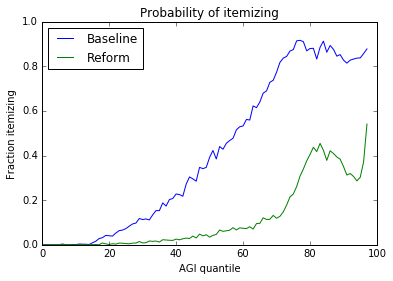

In [13]:
plot_evenly(calc_cl, calc_all_beh, 'ided')

In [17]:
x1 = group_evenly(calc_cl)[4]
for x in x1:
    print x

0.0
0.0
0.0
0.0
1.430583117e-06
0.0
0.00327662970733
0.000851736076573
0.0
0.0015422337452
0.000739526205402
0.00325508081719
0.00271286565132
0.00256122012996
0.00128344950058
0.00876706936703
0.0158499608691
0.0280052370813
0.031922964399
0.0423152900004
0.0403952877166
0.0389876698232
0.05272479251
0.0634589386005
0.0659533872092
0.0725323649786
0.0834723229262
0.0934573136739
0.0974600744293
0.117887311721
0.11310552952
0.116007923755
0.111348448297
0.134128870774
0.153227507035
0.153156978072
0.187620787514
0.173521474321
0.202851425422
0.207363096674
0.227779342879
0.22501743209
0.217486560898
0.271881421621
0.304045580255
0.295354821149
0.285069131846
0.34694590512
0.341338805262
0.346700236381
0.39161878393
0.422843230896
0.384439247577
0.440274332154
0.428175011652
0.454786348777
0.467044752335
0.477459379931
0.515088066823
0.528794139922
0.53261525709
0.561565927436
0.559128403131
0.622297694302
0.614473803746
0.639552906341
0.679286326655
0.689531107712
0.728042848707
0.7370

In [18]:
x2 = group_evenly(calc_all_beh)[4]
for x in x2:
    print x

0.0
0.0
0.0
0.0
0.0
0.0010610251353
0.00191519341477
0.000633521162208
0.000623241797366
0.0
0.0
0.00174920899989
0.00115864333914
0.0
4.99667650168e-06
0.000860370597835
0.00110602224693
0.000372572556186
0.00798582885056
0.00415916384121
0.00147576605594
0.00482051984004
0.00313150318747
0.00779981316714
0.00724154550312
0.00552619429216
0.00446301098079
0.00759906966991
0.00788560808958
0.0147578024728
0.00831047880349
0.00937248950972
0.0169043076313
0.0155930783201
0.0167203970294
0.0123218768948
0.0226836901559
0.0215029446079
0.0203782473023
0.0196424914981
0.025620425614
0.022285948452
0.0269479803375
0.029909455211
0.0283888646047
0.0390894009751
0.0306180834315
0.047917005077
0.0399229754015
0.0452646963061
0.0342136234884
0.0422590366956
0.0464995277311
0.0661563991016
0.0603180907906
0.0627131828806
0.0654698502862
0.0767662216072
0.0664480497648
0.0761118945845
0.073935555418
0.0726434108776
0.0809237556357
0.0705677113358
0.0949015951866
0.0960402510752
0.120957685219
0.1